### TASKS:

* Download data on survival times for liver cancer patients as well as expression data from their sequenced tumors.
* For each transcript, create a survival analysis model, using the lifelines package.  Here each transcript can be tested using, for instance, a Cox’s Proportional Hazard model. Test each transcript by itself as a potential prognostic marker for the survival of the patients.
* As before, apply multiple hypothesis corrections to your calculated p-values.
* Report the number of expression levels that you find prognostic for the survival of the patients in the cohort as a function of q-value.

### Preprocessing of raw dataset i.e things to be done before the task is completed 

* These data are the raw data, thus I need to remove, clean up few thingss before running into survival model. For example, as per now, I can observe the dat have features i.e gene expression in rows and patients in the columns. Maybe it needed to be transposed before running into model

* Survial analysis as per my understanding are the set of statistical method which expects the time period before the event happens.

* Among the different branches of reliably predicting the failure, one of the method invloving the catagorical as well as numerical variable is Cox proportional hazard model.

* As these data expects failure before the event happens, the data comprises of survial and death (as in our data) as possible outcome

* Additionally there should be measurement of time before the event happens.

* Here we need to preprocess the dataset in order to make them work with the survival model to be used for. the first 6 rows are the catargorical variables so first I will precprocess it and change the variables.

* I will read first the raw datset and subset the dummy dataset of say 100 featues. Work with it first and scale for all the big dataset. (Howver scaled it up for all the dataset at the final result form)

### Part 1. Reading the file as python panda dataframe

I have read two dataframes at the moment. All the catagorical variable are read as sur_df.catagories and all the gene expression data as sur_df_expression dataset. I idea is that by completely diving these two kinds of variables it would be helful while choosing the features while modeling during the later survival analysis.

In [14]:
import os as os
import pandas as pd

os.chdir("/Users/salendrapradh/Documents/prj_algo_bioinfo/data/")

sur_df_catagories = pd.read_table("survivalLIHC.txt", header=0,index_col=0, sep="\t",
                                  usecols =list(range(0,365)),skiprows = list (range(7,19578)))

sur_df_expression = pd.read_table("survivalLIHC.txt", header=0,index_col=0, 
                                    sep="\t",usecols =list(range(0,365)),
                                    skiprows = list (range(1,7)))

print(sur_df_catagories.shape)
print(sur_df_expression.shape)

(6, 364)
(19571, 364)


In [25]:
sur_df_catagories.head(6)

,TCGA-FV-A2QQ-01A,TCGA-O8-A75V-01A,TCGA-ED-A7XO-01A,TCGA-BC-A69H-01A,TCGA-DD-A4NR-01A,TCGA-DD-AAEG-01A,TCGA-5C-A9VH-01A,TCGA-4R-AA8I-01A,TCGA-XR-A8TE-01A,TCGA-DD-AAC8-01A,...,TCGA-EP-A2KB-01A,TCGA-CC-A8HS-01A,TCGA-DD-AAE4-01A,TCGA-CC-5258-01A,TCGA-KR-A7K7-01A,TCGA-DD-A39W-01A,TCGA-DD-AACY-01A,TCGA-WX-AA46-01A,TCGA-G3-A7M5-01A,TCGA-DD-AAE9-01A
TCGA.IDs,,,,,,,,,,,,,,,,,,,,,
Gender,male,male,male,male,female,female,male,male,male,male,...,female,male,female,male,female,female,male,male,male,male
Race,white,not reported,asian,white,white,asian,white,white,white,asian,...,white,asian,asian,asian,white,white,asian,white,asian,asian
Stage,stage i,stage i,stage iiia,stage ii,stage i,stage i,stage i,stage ii,stage iiia,stage i,...,stage i,stage iiic,stage i,stage ii,stage ii,stage iii,stage i,stage ii,stage i,stage i
Status,alive,alive,alive,alive,dead,alive,alive,dead,alive,dead,...,dead,dead,alive,dead,alive,dead,alive,alive,alive,alive
Age,29354,19850,10828,23380,31386,21853,25608,24279,5862,26322,...,16835,6617,18009,17586,22587,10699,22332,22639,27963,25451
LivingDays,729,538,427,444,9,719,322,262,925,16,...,596,300,608,129,951,827,1450,756,447,722


In [26]:
t_sur_df = sur_df_catagories.T

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

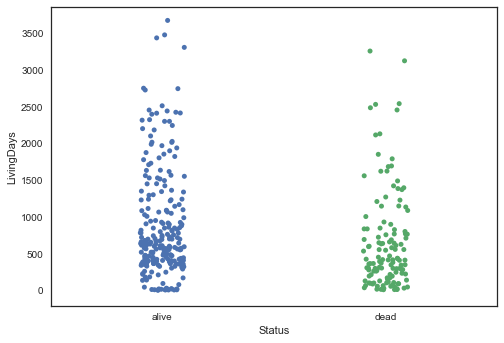

In [329]:
import seaborn as sns
sns.set(style="white", color_codes=True)

sns.stripplot(x="Status", y="LivingDays", data=t_sur_df, jitter=True)
plt.savefig('../result/livingstatusandstatus.png',dpi = 300)

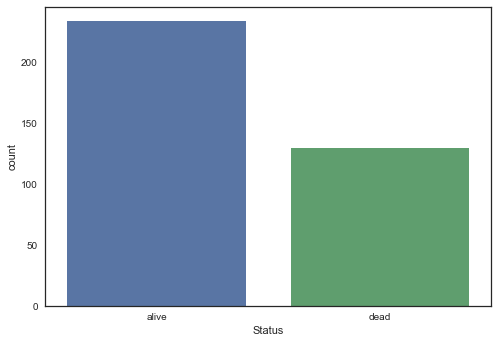

In [360]:
figsize=(12, 12)
sns.countplot(x="Status", data=t_sur_df)
plt.savefig('../result/Status.png',dpi = 300)

In [379]:
t_sur_df['LivingDays'] = t_sur_df['LivingDays'].astype('float64')

In [380]:
## Is there difference between the two groups of living and dead based  on the t test??
from scipy.stats import ttest_ind
alive = t_sur_df[t_sur_df["Status"]=="alive"]["LivingDays"].values.astype('int64')
print (alive.mean())
dead = t_sur_df[t_sur_df["Status"]=="dead"]["LivingDays"].values.astype('int64')
print (dead.mean())
ttest_ind(alive,dead)

896.807692308
655.215384615


Ttest_indResult(statistic=3.0797952080525177, pvalue=0.0022297246195147648)

This was expected but good that we see this so that we can write the term signficantly difference between two groups. 

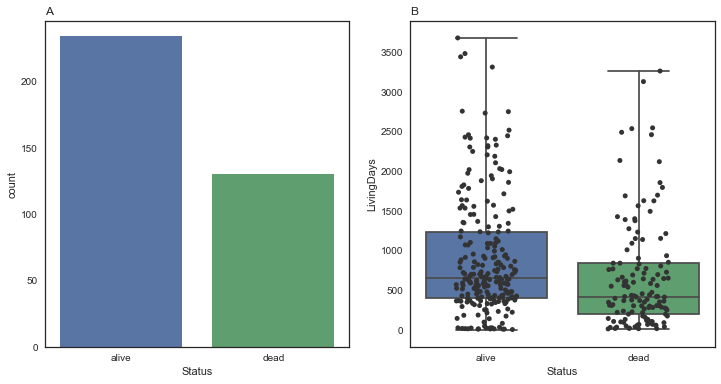

In [394]:
"""
#Combined pictures together for report 

plt.figure(1)
plt.figure(figsize=(12,6)) 

plt.subplot(121)
sns.countplot(x="Status", data=t_sur_df)
plt.title('A', loc='left')

plt.subplot(122)
sns.boxplot(x="Status", y="LivingDays", data=t_sur_df, whis=np.inf)
lib(x="Status", y="LivingDays", data=t_sur_df, jitter=True, color = ".3")
plt.title('B', loc='left')


#plt.savefig('../result/Genderandstatus.png',dpi = 300)

"""

In [30]:
sur_df_expression.head()

,TCGA-FV-A2QQ-01A,TCGA-O8-A75V-01A,TCGA-ED-A7XO-01A,TCGA-BC-A69H-01A,TCGA-DD-A4NR-01A,TCGA-DD-AAEG-01A,TCGA-5C-A9VH-01A,TCGA-4R-AA8I-01A,TCGA-XR-A8TE-01A,TCGA-DD-AAC8-01A,...,TCGA-EP-A2KB-01A,TCGA-CC-A8HS-01A,TCGA-DD-AAE4-01A,TCGA-CC-5258-01A,TCGA-KR-A7K7-01A,TCGA-DD-A39W-01A,TCGA-DD-AACY-01A,TCGA-WX-AA46-01A,TCGA-G3-A7M5-01A,TCGA-DD-AAE9-01A
TCGA.IDs,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003,20.608153,22.793464,25.324883,9.160864,18.288794,10.474451,23.893957,16.447460,31.849855,24.450138,...,29.131608,11.438612,12.125254,49.877097,24.493715,30.576947,11.382966,17.085602,24.037547,64.408918
ENSG00000000005,0.023698,0.000000,0.077757,0.000000,0.035651,0.040265,0.029702,0.219984,0.000000,0.000000,...,0.009387,0.053168,0.034569,0.000000,0.084580,0.271948,0.000000,0.074788,0.024585,0.000000
ENSG00000000419,17.591255,13.526522,24.622914,22.833369,24.347658,33.004060,17.234054,23.337787,18.914443,32.128866,...,27.682953,50.105210,11.573844,17.824043,25.400648,14.494793,14.754792,16.609861,15.888760,26.498470
ENSG00000000457,1.718394,1.992198,1.433225,0.732563,1.795676,3.691994,3.147211,2.013663,1.902299,3.465755,...,2.560069,3.715422,1.742532,2.559697,1.540333,3.045390,2.308710,1.410428,1.092646,1.598885
ENSG00000000460,0.706554,0.763252,0.902149,0.671682,1.093381,0.684443,0.913596,1.270210,1.040897,2.241393,...,1.215671,2.227171,0.624928,1.910679,1.480116,1.999505,0.327769,0.416195,0.285244,2.074873


### Updated in Jan 05 2018

In order to make the datset more reliable , I have considered to filter all the features (rows) that have zero expression values

In [31]:
## drop the rows with all zeros in expression dataframe

sur_df_expression =sur_df_expression[(sur_df_expression.T != 0).any()]
sur_df_expression.shape

(19346, 364)

### Part 2. Coding of the categorical variables into different codes 

As there are certailn categorical variables. It is neccessary to code these variables before running into surival models. But before coding these features, we have to first find each feature catageories and numbers . We can do this by running the print command in each of the variables


In [180]:
print (sur_df_catagories.loc["Gender",:].value_counts())
print (sur_df_catagories.loc["Race",:].value_counts())
print (sur_df_catagories.loc["Stage",:].value_counts())
print (sur_df_catagories.loc["Status",:].value_counts())

male      245
female    119
Name: Gender, dtype: int64
white                               182
asian                               154
black or african american            17
not reported                         10
american indian or alaska native      1
Name: Race, dtype: int64
stage i         170
stage ii         83
stage iiia       63
not reported     24
stage iiic        9
stage iiib        8
stage iii         3
stage ivb         2
stage iv          1
stage iva         1
Name: Stage, dtype: int64
alive    234
dead     130
Name: Status, dtype: int64


The above code gave us tentative idea of the number of feature number in each catagorical variables. THe given TCGA data consists of 245 male and 119 female out of which 234 are alive and 130 patients are dead. Furthermore, we can also observe the different stages of cancer subtypes in above datasets. 

In [33]:
## Well there is complete cases for gender and Status features (which is of course should be easy !!!), however the 
## problem are with other features i.e "Stage" and "Race" lets make a dictionary of encoding and change it 

encoders = {"Race" : {"white": 1, "asian": 2, "black or african american": 3, 
                       "american indian or alaska native": 4, "not reported": "NaN"},
            "Stage" : {"stage i": 1, "stage ii": 2, "stage iii": 3, "stage stage iv": 4,
                       "stage iiia": 5, "stage iiib" : 6, "stage iiic": 7,
                        "stage iva": 8, "stage ivb": 9 , "not reported" : "NaN"},
            "Gender" : {"male": 1, "female": 2},
            "Status" : {"alive": 0, "dead": 1}
           }
sur_df_catagories.T.replace(encoders).head()
## tried with inplace == True but works with only few at moment so used this in later code where it can be used to 
## to change while subsetting for each features

TCGA.IDs,Gender,Race,Stage,Status,Age,LivingDays
TCGA-FV-A2QQ-01A,1,1,1,0,29354,729
TCGA-O8-A75V-01A,1,NaN,1,0,19850,538
TCGA-ED-A7XO-01A,1,2,5,0,10828,427
TCGA-BC-A69H-01A,1,1,2,0,23380,444
TCGA-DD-A4NR-01A,2,1,1,1,31386,9


The idea was to use tha above command to encode the catageorical variables. But I thought to use it later thus we combine the two expression and catagorical variable dataset together to get a big dataset as show in below

In [34]:
surv_all = pd.concat([sur_df_catagories, sur_df_expression])

In [35]:
surv_all.shape

(19352, 364)

### Part 3. Implementation of Cox proportional hazard survival analysis model in the above combined dataset

Now we have all preprocessed dataset where we have removed the dataset which have removed the gene expressions which have no expression in all the patients and a coding scheme for all the catageorical varaibles in the dataset. I guess we can look into survial analysis using cox proporitional hazard.A R implementation of the survial is given as [coxph](https://cran.r-project.org/web/packages/survival/survival.pdf) function in survival package which seemed to be straight forward. However thre is a python implementation and introduction to survival model is given in the following [lifelines](http://lifelines.readthedocs.io/en/latest/Survival%20Analysis%20intro.html#survival-function) module. Two important parameters of survial analysis are survival function and hazard curve. 

I am subsetting one of the gene expression (ENSG00000000003) dataset and optimizing it before running into all the features

In [172]:
## Now since we have all the data in python, we can further explore using python survival implmentation. For this, lets
## first work out with one feature of gene. We would like our dataset to have the normal n X features

feature  = surv_all.loc[["Status","LivingDays","ENSG00000000003"], :].T.replace(encoders).copy()
feature.dtypes
feature['LivingDays'] = feature['LivingDays'].astype('float64')
feature["ENSG00000000003"] = feature['ENSG00000000003'].astype('float64')
feature.head(10)

TCGA.IDs,Status,LivingDays,ENSG00000000003
TCGA-FV-A2QQ-01A,0,729.0,20.608153
TCGA-O8-A75V-01A,0,538.0,22.793464
TCGA-ED-A7XO-01A,0,427.0,25.324883
TCGA-BC-A69H-01A,0,444.0,9.160864
TCGA-DD-A4NR-01A,1,9.0,18.288794
TCGA-DD-AAEG-01A,0,719.0,10.474451
TCGA-5C-A9VH-01A,0,322.0,23.893957
TCGA-4R-AA8I-01A,1,262.0,16.447460
TCGA-XR-A8TE-01A,0,925.0,31.849855
TCGA-DD-AAC8-01A,1,16.0,24.450138


well there are few things that needed to sorted out before fitting into the curve, it was alot of hit and trial, especially regarding the data to be float type as if you put the integer most of the features will be again 0 values and will not give any result. Followung that lets use this gene expression as prognostic marker of status 0 being dead and 1 being alive at T living days.  As per the [instruction][http://lifelines.readthedocs.io/en/latest/Survival%20Regression.html#cox-s-proportional-hazard-model] using the coxPHFitter we might get a pvalues estimate of significance of expression of the gene as the surival of patients.

In [173]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(feature, 'LivingDays', event_col = 'Status')
p_value = cph.summary.loc["ENSG00000000003"][-3]
cph.summary

,coef,exp(coef),se(coef),z,p,lower 0.95,upper 0.95
TCGA.IDs,,,,,,,
ENSG00000000003,-0.005777,0.99424,0.007376,-0.783224,0.433496,-0.020233,0.008679


In [174]:
print (p_value)

0.433495555278


In [175]:
cph.hazards_

TCGA.IDs,ENSG00000000003
coef,-0.005777


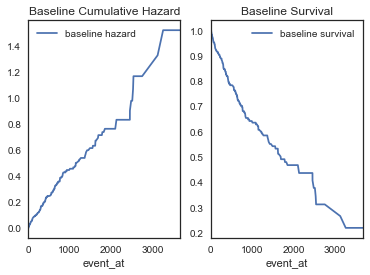

In [250]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
cph.baseline_cumulative_hazard_.plot(ax = axes[0], title = "Baseline Cumulative Hazard")
cph.baseline_survival_.plot(ax = axes[1], title = "Baseline Survival")

plt.savefig('../result/survial_plot_one_mock_gene.png',dpi = 300)

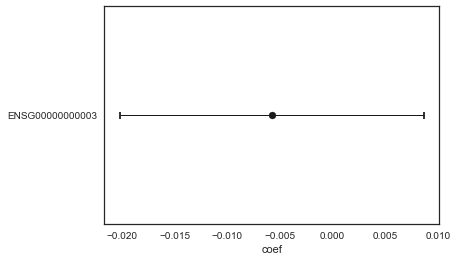

In [177]:
cph.plot()

Well upto this point, we have a survival analysis for one of the feature, particulary  "ENSG00000000003". Although the p-value doesn't look any interesting. Now lets scale up to all the features from our complete dataset. This would require looping in complete dataframe i.e surv_all. We can loop it rowise in our datset and take each features consequtively and store p.values in dictionary containaing the feature name 

In [51]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
features = ["Status", "LivingDays"]
other_features = ["Age", "Race", "Stage", "Gender"]

erroronous_features = ["ENSG00000006116", "ENSG00000077063", "ENSG00000082556", 
                       "ENSG00000091844", "ENSG00000094661","ENSG00000100146",
                       "ENSG00000100292", "ENSG00000101282", "ENSG00000104818",
                      "ENSG00000105143", "ENSG00000109101", "ENSG00000113196",
                      "ENSG00000114113","ENSG00000121351", "ENSG00000121742",
                       "ENSG00000123407", "ENSG00000123576","ENSG00000123977",
                      "ENSG00000124493","ENSG00000127252","ENSG00000128714",
                       "ENSG00000129152","ENSG00000130711","ENSG00000131096","ENSG00000132932",
                      "ENSG00000133433","ENSG00000133878","ENSG00000134438","ENSG00000134762",
                      "ENSG00000136099","ENSG00000136943","ENSG00000139304","ENSG00000139780",
                      "ENSG00000140481","ENSG00000142549","ENSG00000143546","ENSG00000143595",
                      "ENSG00000145087","ENSG00000146151","ENSG00000147571","ENSG00000148604",
                       "ENSG00000148408","ENSG00000234278",
                      "ENSG00000149968","ENSG00000152430","ENSG00000152463","ENSG00000154645",
                      "ENSG00000155622","ENSG00000157884","ENSG00000159409","ENSG00000161652",
                      "ENSG00000163220","ENSG00000163530","ENSG00000164256","ENSG00000165588",
                      "ENSG00000165643","ENSG00000167531","ENSG00000168269","ENSG00000169059",
                      "ENSG00000169807","ENSG00000169836","ENSG00000169840","ENSG00000169906",
                      "ENSG00000170477","ENSG00000170748","ENSG00000170890","ENSG00000170959",
                      "ENSG00000171360","ENSG00000171478","ENSG00000174562","ENSG00000176782",
                      "ENSG00000176887","ENSG00000176922","ENSG00000177143","ENSG00000177186",
                      "ENSG00000177504","ENSG00000178597","ENSG00000179008","ENSG00000179046",
                      "ENSG00000179412","ENSG00000179603","ENSG00000181767","ENSG00000182103",
                      "ENSG00000182177","ENSG00000182261","ENSG00000182645","ENSG00000183862",
                      "ENSG00000184345","ENSG00000184507","ENSG00000184697","ENSG00000185448",
                      "ENSG00000185823","ENSG00000186086","ENSG00000186895","ENSG00000186912",
                      "ENSG00000187170","ENSG00000187690","ENSG00000188782","ENSG00000189299",
                      "ENSG00000196218","ENSG00000196427","ENSG00000197616","ENSG00000197870",
                      "ENSG00000198601","ENSG00000198765","ENSG00000203909","ENSG00000204595",
                      "ENSG00000204767","ENSG00000204849","ENSG00000205279","ENSG00000206043",
                      "ENSG00000206579","ENSG00000214819","ENSG00000215029","ENSG00000221900",
                      "ENSG00000224089","ENSG00000224109","ENSG00000226372","ENSG00000240224",
                      "ENSG00000240386","ENSG00000254834", "ENSG00000255223","ENSG00000265303",
                       "ENSG00000265763","ENSG00000273049","ENSG00000276040","ENSG00000279824", 
                      "ENSG00000279849","ENSG00000279850","ENSG00000279857"]

result = {}

#for names, value in tmp2.iterrows():
for names, value in surv_all.iterrows():
    if names in features or names in other_features or names in erroronous_features:
        continue
    feature_df = surv_all.loc[features+[names],:].T.replace(encoders).copy() 
    feature_df['LivingDays'] = feature_df['LivingDays'].astype('float64')
    feature_df[names] = feature_df[names].astype('float64')
    cph.fit(feature_df, 'LivingDays', event_col = 'Status')
    p_value = cph.summary.loc[names][-3]
    result [names] = p_value

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000006059'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000006059'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000008197'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000101203'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000101438'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000101438'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000106304'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000106304'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000106341'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000116996'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000116996'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000117501'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000122728'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000122728'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000123165'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000125522'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000125522'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000125533'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000129862'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000129862'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000129864'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000132975'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000132975'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000133105'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000136697'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000136839'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000136839'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000141946'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000141946'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000142224'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000147081'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000147081'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000147613'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000149507'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000149507'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000149651'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000151838'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000151838'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000152093'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000156282'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000156282'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000156575'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000162456'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000162456'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000162621'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000164458'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000164458'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000164500'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000166368'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000166368'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000166748'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000168930'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000168930'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000169154'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170484'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170605'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000170605'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170929'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000170929'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000170948'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000171481'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000171481'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000171489'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172188'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000172188'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172209'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172487'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000172487'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000172489'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000173464'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000173464'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000173627'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000174876'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000174876'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000174914'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000175485'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000175514'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000175514'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176253'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000176253'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176256'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176742'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000176742'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000176774'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000177243'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000177243'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000177324'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000178358'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000178358'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000178403'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000179468'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000179468'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000179615'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000180347'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000180347'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000180433'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000181752'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000181752'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000181761'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182083'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000182083'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182170'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182783'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000182783'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000182816'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000183148'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000183148'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000183206'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184166'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000184166'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184276'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184933'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000184933'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000184945'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000185873'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000185873'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000185926'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186190'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186190'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186288'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186628'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186628'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186788'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000186971'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000186971'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187003'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187664'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000187664'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000187701'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000188340'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000188379'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000188379'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000189090'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000189090'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000189132'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000196166'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196171'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000196171'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196826'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000196826'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000196832'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197454'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000197454'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197591'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000197991'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000197991'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198083'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198445'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000198445'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000198570'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000203795'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000203795'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000203818'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204363'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000204363'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204414'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204779'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000204779'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000204873'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000205457'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000205495'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000205495'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000206199'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000206199'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000206260'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000212900'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000212900'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000212933'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000214414'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000214414'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000214518'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000215343'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000215343'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000215356'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221836'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000221836'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221837'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221954'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000221954'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000221961'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000225781'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000225781'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000226288'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000229571'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000229571'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000229859'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000233701'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000233701'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000233816'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000236125'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000236334'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000236334'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000239605'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000239886'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000239886'] have very low variance when conditioned on death event or not. This may 

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000243130'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000243130'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000243207'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000249693'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000249693'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000249861'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000253117'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000253117'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000253148'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000255730'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000255730'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000255767'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000258083'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000258150'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000258150'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000259522'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000259522'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000260287'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000261796'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000261796'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000262628'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000267618'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000267618'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000267740'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000269095'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000269226'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000269226'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logist

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000270601'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000270601'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000271321'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000274102'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000274102'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000274226'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000275553'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000275553'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000275954'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000278057'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000278057'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000278139'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000279380'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000279380'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000279493'] have very low variance. This may harm convergence. Try dropping this red

/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000281613'] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:990: RuntimeWarning: Column(s) ['ENSG00000281613'] have very low variance when conditioned on death event or not. This may harm convergence. This is a form of 'complete separation'. See https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqwhat-is-complete-or-quasi-complete-separation-in-logisticprobit-regression-and-how-do-we-deal-with-them/ 
  warnings.warn(warning_text, RuntimeWarning)
/Users/salendrapradh/anaconda3/lib/python3.6/site-packages/lifelines/utils/__init__.py:978: RuntimeWarning: Column(s) ['ENSG00000281887'] have very low variance. This may harm convergence. Try dropping this red

**There is a error given by the model when running for all the features,. It calls out as ValueError: delta contains nan value(s). Convergence halted. I am wondiering that the values are too low to give any model output . At the moment, I can finding out these features that gives all these errros and possibly later debug it. It is named under the list erronoeus list at the moment. Additionally, I made a change to remove all the features that had 0 expression in all features. In order to find these erronoeus features I used a simple reiterative script that would halt take the feature upto the last perfectly executed features and skip the next feature and rerun from that run.

The following snippet of code is used iteratively to get the complete list of erroneous feature which are removed from current analysis. This was quite a exhaustive task. As per my understaning. here are features there is very sparse expression pattern. Most of the gene transcript is completely 0s . Thus this might be causing these errors. But having said that, these are quite smaller features excluded from the analysis. 

In [395]:
len(erroronous_features)

130

In [38]:
"""
erroronous_features = []
completed_feat = len(list(result.keys()))
prob_feaature = surv_all.index[completed_feat+1]
erroronous_features.append(prob_feaature)


## now lets loop again execuding the erronoes feature 
tmp = surv_all.loc[completed_feat+2:surv_all.index[-1],:]
tmp.shape
tmp2 = pd.concat([sur_df_catagories,tmp ])
tmp2.head(n = 7)
"""


'ENSG00000072694'

In [52]:
print (list(result.keys())[-1])
print (len(list(result.keys())))

ENSG00000281889
19219


In [53]:
surv_all.index[-1]

'ENSG00000281889'

Here we get the dictionary of list pvalues and gene transcipt expressions from the survival analysis using Cox survival model for individual gene expression.

### Part 4.  Multiple hypothesis corrections to your the pre calculated p-values

For this we need to have to consider using the function that was made earlier in our class. However it has to be made more robust in comparision to the one that we had done earlier. Here I have used the codes that was made earlier.

First of all, lets get the result files as panda dataframe and add column nnames of "Gene_ID" and "p-values" and sort them on the basis of p-values.

In [155]:
Result_df= pd.DataFrame(list(result.items()), columns=['Gene_ID', 'p_value'])
sorted_result_df = Result_df.sort_values(["p_value"])
sorted_result_df.head(10)

,Gene_ID,p_value
14780,ENSG00000183520,1.622069e-13
8178,ENSG00000143179,3.046395e-12
947,ENSG00000065978,5.244555e-12
6809,ENSG00000134697,1.966585e-11
6808,ENSG00000134690,2.256371e-11
6725,ENSG00000134222,2.869651e-11
6806,ENSG00000134684,4.039386e-11
4078,ENSG00000112984,5.117823e-11
14577,ENSG00000182481,9.660095e-11
1680,ENSG00000086475,2.438135e-10


In [185]:
## at intial p < 0.05 how many gene features are found 

genes_pvalue_cutoff = sorted_result_df[sorted_result_df["p_value"] < 0.05]
genes_pvalue_cutoff.shape

(6037, 2)

In [65]:
p_values_list = np.array(sorted_result_df["p_value"])
gene_id = np.array(sorted_result_df["Gene_ID"])

In [66]:
##Estimate pi_0 for the p-values that we found and implemented from the http://www.pnas.org/content/pnas/100/16/9440.full.pdf
## appedix 3

length = len(p_values_list)
lamda = np.arange(0.01, 0.96,0.01)
weights =np.array([length-np.argmax(p_values_list>=l) for l in lamda])
estpi0=np.array([weights[i] / (length * (1 - lamda[i])) for i in range(lamda.size)])
## here we get the minimum of the lambda estimates as the inital lambda0
min_estpi_0= np.min(estpi0)
min_estpi_0

0.54187448432726548

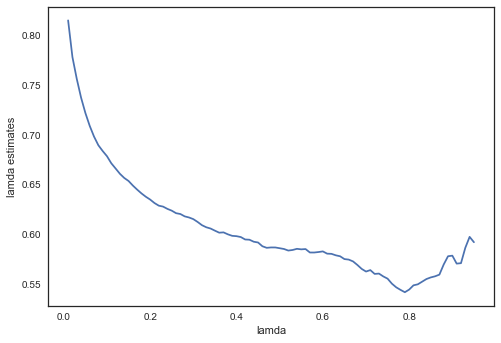

In [195]:
plt.plot(lamda,estpi0)
plt.ylabel("lamda estimates")
plt.xlabel("lamda")
plt.show()

plt.savefig('../result/lamdaestimates.png',dpi = 300)

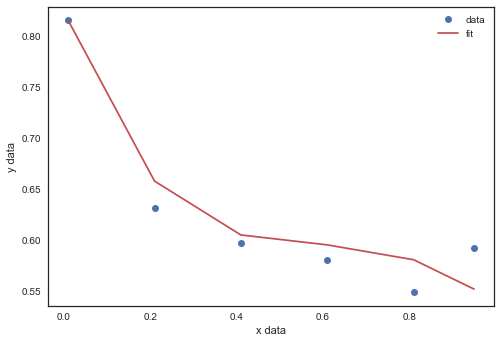

In [196]:
from scipy.interpolate import interp1d

new_lamda = np.array([lamda[0], lamda [20], lamda[40],lamda[60],lamda[80], lamda[-1]])
new_estpi0= np.array([estpi0[0], estpi0[20], estpi0[40], estpi0[60], estpi0[80], estpi0[-1]])

f = interp1d(new_lamda, new_estpi0, kind="cubic")
desiredRange =  np.arange(0.01, 0.9,0.15)
interpolatedData = f(desiredRange)

plt.plot(new_lamda,new_estpi0,'bo')
plt.plot(new_lamda, interpolatedData,'r-')
plt.legend(['data','fit'], loc='best', numpoints=1)
plt.xlabel('x data')
plt.ylabel('y data')
plt.savefig('../result/fitting_cubic.png',dpi = 300)

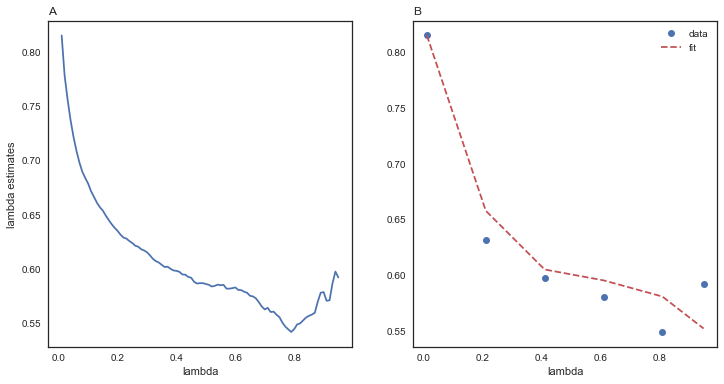

In [318]:
"""
#Combined pictures together for report
plt.figure(1)
plt.figure(figsize=(12,6)) 

plt.subplot(121)
plt.plot(lamda,estpi0)
plt.xlabel('lambda')
plt.ylabel('lambda estimates')
plt.title('A', loc='left')

plt.subplot(122)
plt.plot(new_lamda,new_estpi0,'bo')
plt.plot(new_lamda, interpolatedData,'r--')
plt.legend(['data','fit'], loc='best', numpoints=1)
plt.xlabel('lambda')
plt.title('B', loc='left')

plt.savefig('../result/lambdaestimatescurvefitting.png', dpi =300)


"""


In [251]:
estpi0_greater_075= estpi0[60:95]
avg_estpi_0 = np.mean(estpi0_greater_075)

In [252]:
avg_estpi_0

0.56538035010159837

In [253]:
index= 0
qvalues = []
length = len(p_values_list)

## for the first part of the equation
for p in p_values_list:
    index = index+1
    qval = (p * length * avg_estpi_0)/ index
    qvalues.append(qval)


## second part of the equation considering the highest of pvalues is 1 at p(n+1) feature and using this to find the min
## at the final values
q_final = 1.0
qvalues.reverse()
for i in range (len(qvalues)):
    q = min(qvalues[i], q_final)
    q_final = q
    qvalues[i]= q

qvalues.reverse()

In [254]:
Final_dataframe = pd.DataFrame(list(zip(p_values_list, qvalues, gene_id)))

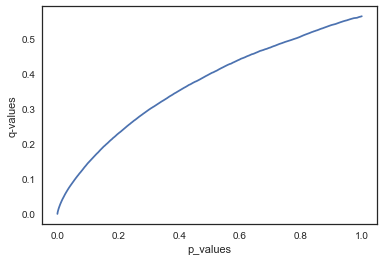

In [258]:
plt.plot(Final_dataframe[0],Final_dataframe[1]) 
plt.ylabel("q-values")
plt.xlabel("p_values")
plt.show()
plt.savefig('../result/pVsq.png',dpi = 300)

In [261]:
accepted_gene = Final_dataframe[Final_dataframe[1] < 0.05]

#accepted_gene = Final_dataframe[Final_dataframe[1] < 0.01]

In [262]:
accepted_gene.head()

,0,1,2
0,1.622069e-13,1.762548e-09,ENSG00000183520
1,3.046395e-12,1.655113e-08,ENSG00000143179
2,5.244555e-12,1.899586e-08,ENSG00000065978
3,1.966585e-11,4.903566e-08,ENSG00000134697
4,2.256371e-11,4.903566e-08,ENSG00000134690


In [263]:
accepted_gene.tail()

,0,1,2
4644,0.021291,0.049805,ENSG00000132000
4645,0.021323,0.049869,ENSG00000131233
4646,0.021357,0.049939,ENSG00000115459
4647,0.021379,0.049981,ENSG00000258102
4648,0.021387,0.049987,ENSG00000215009


In [264]:
accepted_gene.shape

(4649, 3)

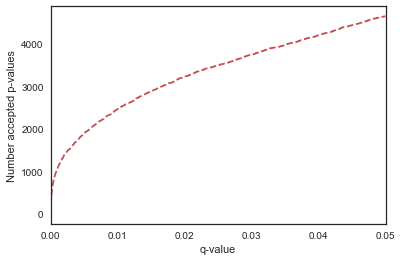

In [283]:
import numpy as np
import matplotlib.pyplot as plt

#list(range(len(accepted_analyte["p-value"])))

plt.plot(accepted_gene[1], list(range(len(accepted_gene[0]))),'r--')
plt.ylabel("Number accepted p-values")
plt.xlabel("q-value")
plt.xlim(0,0.05)
plt.show()
plt.savefig('../result/accepted_pvaluevsqvalues_0.05.png',dpi = 300)

Thus, from the above graph we can say that we have accepted 4649 gene expression as the prognostic for the survival of the patients in the cohort as a function of q-value at 0.05. 

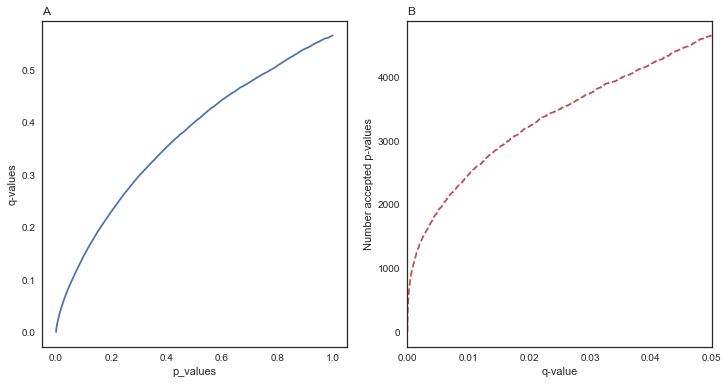

In [319]:
"""
#Combined pictures together for report
plt.figure(1)
plt.figure(figsize=(12,6)) 

plt.subplot(121)
plt.plot(Final_dataframe[0],Final_dataframe[1]) 
plt.ylabel("q-values")
plt.xlabel("p_values")
plt.title('A', loc='left')

plt.subplot(122)
plt.plot(accepted_gene[1], list(range(len(accepted_gene[0]))),'r--')
plt.ylabel("Number accepted p-values")
plt.xlabel("q-value")
plt.xlim(0,0.05)
plt.title('B', loc='left')

plt.savefig('../result/comb.png', dpi =300)
"""

Sanity check: So if the genes we have isolated are prognostic marker then it should aready be in public database. For this we can look into [human protein atlas](https://www.proteinatlas.org/) and observe do they have some information regarding out hits. The top hit i.e "ENSG00000183520" is already marked as prognostic marker in human protein atlas and have [pvalue <0.001](https://www.proteinatlas.org/ENSG00000183520-UTP11/pathology/tissue/liver+cancer) in Liver cancer. So may be we are doing something right here!!! 

Additionally, I found that if we set up FDR at 1% , we might have similar result to that of human protein atlas. However this would significantly decrease our accepted gene transcript. 

Interesting observation in their survival plot, they have taken the RPKM values and divided into 2 groups and they done the survival analysis in these 2 groups. Maybe we can do it as well but later in the above model.